## Assignment 2
### Setup

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

con = sqlite3.connect("database.sqlite")

# helper function to run SQL queries
def sql(q, params=None):
    return pd.read_sql_query(q, con, params=params or [])


In [3]:
for t in ["League", "Match", "Team", "Team_Attributes", "Player", "Player_Attributes"]:
    try:
        print(f"\n{t} (first 3 rows)")
        display(sql(f"select * from {t} limit 3"))
    except Exception as e:
        print(f"{t}: {e}")



League (first 3 rows)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1



Match (first 3 rows)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75



Team (first 3 rows)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC
2,3,10000,15005,SV Zulte-Waregem,ZUL



Team_Attributes (first 3 rows)


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover



Player (first 3 rows)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163



Player_Attributes (first 3 rows)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8


### 1. Filter for England and Spain leagues.

In [4]:
leagues = sql("""
    select id as league_id, name
    from league
    where name in ('Spain LIGA BBVA', 'England Premier League')
""")
display(leagues)

,league_id,name
0,1729,England Premier League
1,21518,Spain LIGA BBVA


### 2. List statistics for your favorite team from the Premier League and La Liga

In [5]:
matches = sql("""
    select
        m.id,
        m.season,
        l.name as league_name,
        t1.team_long_name as home_team,
        t2.team_long_name as away_team,
        m.home_team_goal,
        m.away_team_goal
    from match m
    join league l on l.id = m.league_id
    join team t1 on t1.team_api_id = m.home_team_api_id
    join team t2 on t2.team_api_id = m.away_team_api_id
    where l.name = 'Spain LIGA BBVA'
""")


In [6]:
home = matches[["league_name", "season", "home_team", "home_team_goal", "away_team_goal"]].rename(
    columns={"home_team": "team", "home_team_goal": "gf", "away_team_goal": "ga"}
)
away = matches[["league_name", "season", "away_team", "away_team_goal", "home_team_goal"]].rename(
    columns={"away_team": "team", "away_team_goal": "gf", "home_team_goal": "ga"}
)

In [7]:
all_matches = pd.concat([home, away], ignore_index=True)

def result(row):
    if row["gf"] > row["ga"]:
        return "win"
    elif row["gf"] < row["ga"]:
        return "loss"
    else:
        return "draw"

all_matches["Result"] = all_matches.apply(result, axis=1)
all_matches["Pts"] = all_matches["Result"].map({"win": 3, "draw": 1, "loss": 0})

team_stats = (
    all_matches.groupby(["league_name", "season", "team"], as_index=False)
    .agg(
        Games=("Result", "count"),
        Wins=("Result", lambda s: (s == "win").sum()),
        Draws=("Result", lambda s: (s == "draw").sum()),
        Losses=("Result", lambda s: (s == "loss").sum()),
        GF=("gf", "sum"),
        GA=("ga", "sum"),
        Pts=("Pts", "sum"),
    )
)

team_stats["GD"] = team_stats["GF"] - team_stats["GA"]

team_stats = team_stats.rename(columns={
    "league_name": "League",
    "season": "Season",
    "team": "Team"
})

display(team_stats.tail(15))

,League,Season,Team,Games,Wins,Draws,Losses,GF,GA,Pts,GD
145,Spain LIGA BBVA,2015/2016,Levante UD,38,8,8,22,37,70,32,-33
146,Spain LIGA BBVA,2015/2016,Málaga CF,38,12,12,14,38,35,48,3
147,Spain LIGA BBVA,2015/2016,RC Celta de Vigo,38,17,9,12,51,59,60,-8
148,Spain LIGA BBVA,2015/2016,RC Deportivo de La Coruña,38,8,18,12,45,61,42,-16
149,Spain LIGA BBVA,2015/2016,RCD Espanyol,38,12,7,19,40,74,43,-34
150,Spain LIGA BBVA,2015/2016,Rayo Vallecano,38,9,11,18,52,73,38,-21
151,Spain LIGA BBVA,2015/2016,Real Betis Balompié,38,11,12,15,34,52,45,-18
152,Spain LIGA BBVA,2015/2016,Real Madrid CF,38,28,6,4,110,34,90,76
153,Spain LIGA BBVA,2015/2016,Real Sociedad,38,13,9,16,45,48,48,-3
154,Spain LIGA BBVA,2015/2016,Real Sporting de Gijón,38,10,9,19,40,62,39,-22


### 3. Select team attributes.

In [8]:
team_attributes_spain = sql("""
    select *
    from team_attributes ta
    where ta.team_api_id in (
        select distinct t.team_api_id
        from team t
        join match m on t.team_api_id in (m.home_team_api_id, m.away_team_api_id)
        join league l on l.id = m.league_id
        where l.name = 'Spain LIGA BBVA'
    )
""")

display(team_attributes_spain.head(10))

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,40,1861,9865,2010-02-22 00:00:00,65,Balanced,NaN,Little,45,Mixed,...,70,Lots,Organised,70,High,65,Press,30,Narrow,Cover
1,41,1861,9865,2011-02-22 00:00:00,55,Balanced,NaN,Little,53,Mixed,...,69,Lots,Organised,58,Medium,68,Double,67,Wide,Cover
2,42,1861,9865,2012-02-22 00:00:00,42,Balanced,NaN,Little,70,Long,...,40,Normal,Organised,37,Medium,53,Press,45,Normal,Cover
3,43,1861,9865,2013-09-20 00:00:00,46,Balanced,NaN,Little,65,Mixed,...,40,Normal,Organised,37,Medium,53,Press,45,Normal,Cover
4,44,1861,9865,2014-09-19 00:00:00,46,Balanced,41.0,Normal,65,Mixed,...,40,Normal,Organised,37,Medium,53,Press,45,Normal,Cover
5,45,1861,9865,2015-09-10 00:00:00,46,Balanced,41.0,Normal,65,Mixed,...,40,Normal,Organised,37,Medium,53,Press,45,Normal,Cover
6,89,448,8315,2010-02-22 00:00:00,60,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,30,Deep,70,Double,35,Normal,Cover
7,90,448,8315,2011-02-22 00:00:00,70,Fast,NaN,Little,69,Long,...,57,Normal,Organised,48,Medium,67,Double,55,Normal,Cover
8,91,448,8315,2012-02-22 00:00:00,42,Balanced,NaN,Little,59,Mixed,...,59,Normal,Organised,37,Medium,60,Press,68,Wide,Cover
9,92,448,8315,2013-09-20 00:00:00,46,Balanced,NaN,Little,38,Mixed,...,37,Normal,Free Form,37,Medium,60,Press,68,Wide,Cover


### 4. Select player attributes.

In [9]:
matches = sql("""
    select *
    from match m
    join league l on l.id = m.league_id
    where l.name = 'Spain LIGA BBVA'
""")

player_cols = [col for col in matches.columns if 'home_player_' in col or 'away_player_' in col]
player_ids = pd.unique(matches[player_cols].values.ravel())
player_ids = [pid for pid in player_ids if pd.notnull(pid)]

ids_str = ','.join(str(int(pid)) for pid in player_ids)
query = f"select * from player_attributes where player_api_id in ({ids_str}) limit 100"
player_attributes_spain = sql(query)

display(player_attributes_spain.head(10))

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,243,183853,40719,2016-04-28 00:00:00,70,71,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
1,244,183853,40719,2016-04-14 00:00:00,70,72,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
2,245,183853,40719,2016-01-21 00:00:00,70,72,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
3,246,183853,40719,2015-12-17 00:00:00,71,73,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
4,247,183853,40719,2015-11-12 00:00:00,71,73,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
5,248,183853,40719,2015-11-06 00:00:00,71,73,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
6,249,183853,40719,2015-10-02 00:00:00,71,74,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
7,250,183853,40719,2015-09-25 00:00:00,71,74,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
8,251,183853,40719,2015-09-21 00:00:00,70,73,left,medium,medium,64,...,62,67,36,31,37,14,13,9,15,10
9,252,183853,40719,2015-03-06 00:00:00,70,75,left,medium,medium,65,...,64,66,35,30,36,13,12,8,14,9


### 5. Implement your own gradient descent code for Logistic Regression and SVM.

In [20]:
df = sql("select * from player_attributes where attacking_work_rate in ('high','medium') limit 1000")
df = df.dropna()

features = ['overall_rating', 'potential', 'shot_power', 'stamina', 'strength']
x = df[features].values.astype(float)
y = (df['attacking_work_rate'] == 'high').astype(int).values  # 1=high, 0=medium

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
mu = x_train.mean(axis=0)
sd = x_train.std(axis=0) + 1e-8
x_train = (x_train - mu) / sd
x_test  = (x_test  - mu) / sd


In [21]:
def add_bias(a):
    return np.c_[np.ones(a.shape[0]), a]

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

In [23]:
def logreg_gd(x, y, lr=0.1, n_iter=500, lam=1e-3):
    x1 = add_bias(x)
    w = np.zeros(x1.shape[1])
    hist = []
    n = x1.shape[0]
    for _ in range(n_iter):
        p = sigmoid(x1 @ w)
        eps = 1e-12
        loss = (-(y*np.log(p+eps) + (1-y)*np.log(1-p+eps)).mean()
                + 0.5*lam*np.sum(w[1:]**2)/n)
        hist.append(loss)
        grad = (x1.T @ (p - y)) / n
        grad[1:] += (lam * w[1:]) / n
        w -= lr * grad
    return w, np.array(hist)

def logreg_predict(x, w):
    return (sigmoid(add_bias(x) @ w) >= 0.5).astype(int)

def svm_gd(x, y, lr=0.01, n_iter=500, lam=1e-3):
    y2 = np.where(y > 0, 1.0, -1.0)
    x1 = add_bias(x)
    w = np.zeros(x1.shape[1])
    hist = []
    n = x1.shape[0]
    for _ in range(n_iter):
        m = y2 * (x1 @ w)
        viol = m < 1.0
        hinge = np.maximum(0.0, 1.0 - m).mean()
        loss = hinge + 0.5*lam*np.sum(w[1:]**2)/n
        hist.append(loss)
        g = -(x1[viol].T @ y2[viol]) / n
        g[1:] += (lam * w[1:]) / n
        w -= lr * g
    return w, np.array(hist)

def svm_predict(x, w):
    return (add_bias(x) @ w >= 0).astype(int)

In [24]:
w_log, hist_log = logreg_gd(x_train, y_train, lr=0.1, n_iter=500, lam=1e-3)
pred_log = logreg_predict(x_test, w_log)
acc_log = (pred_log == y_test).mean()

w_svm, hist_svm = svm_gd(x_train, y_train, lr=0.01, n_iter=500, lam=1e-3)
pred_svm = svm_predict(x_test, w_svm)
acc_svm = (pred_svm == y_test).mean()

print(f'logreg test acc: {acc_log:.3f}')
print(f'svm    test acc: {acc_svm:.3f}')

logreg test acc: 0.823
svm    test acc: 0.793


### 6. Do your hyperparameter search.

In [25]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

log_lrs  = [0.1, 0.05]
log_lams = [0.0, 1e-3]

svm_lrs  = [0.03, 0.01]
svm_lams = [0.0, 1e-3]

In [26]:
best_log = None # tuning
best_log_acc = -1.0
for lr in log_lrs:
    for lam in log_lams:
        w, _ = logreg_gd(x_tr, y_tr, lr=lr, n_iter=300, lam=lam)
        acc = (logreg_predict(x_val, w) == y_val).mean()
        if acc > best_log_acc:
            best_log_acc = acc
            best_log = (lr, lam)

# tune svm
best_svm = None
best_svm_acc = -1.0
for lr in svm_lrs:
    for lam in svm_lams:
        w, _ = svm_gd(x_tr, y_tr, lr=lr, n_iter=300, lam=lam)
        acc = (svm_predict(x_val, w) == y_val).mean()
        if acc > best_svm_acc:
            best_svm_acc = acc
            best_svm = (lr, lam)

In [27]:
w_log_best, hist_log_best = logreg_gd(x_train, y_train, lr=best_log[0], n_iter=500, lam=best_log[1])
log_test_acc = (logreg_predict(x_test, w_log_best) == y_test).mean()

w_svm_best, hist_svm_best = svm_gd(x_train, y_train, lr=best_svm[0], n_iter=500, lam=best_svm[1])
svm_test_acc = (svm_predict(x_test, w_svm_best) == y_test).mean()

print("best logreg (lr, lam):", best_log, " test acc:", round(log_test_acc, 3))
print("best svm    (lr, lam):", best_svm, " test acc:", round(svm_test_acc, 3))

best logreg (lr, lam): (0.05, 0.0)  test acc: 0.827
best svm    (lr, lam): (0.03, 0.0)  test acc: 0.793


### 7. Calculate your training and test accuracies.

In [28]:
train_acc_log = (logreg_predict(x_train, w_log_best) == y_train).mean()
test_acc_log  = (logreg_predict(x_test,  w_log_best) == y_test).mean()

train_acc_svm = (svm_predict(x_train, w_svm_best) == y_train).mean()
test_acc_svm  = (svm_predict(x_test,  w_svm_best) == y_test).mean()

print(f"logreg  train acc: {train_acc_log:.3f}   test acc: {test_acc_log:.3f}")
print(f"svm     train acc: {train_acc_svm:.3f}   test acc: {test_acc_svm:.3f}")

logreg  train acc: 0.834   test acc: 0.827
svm     train acc: 0.791   test acc: 0.793


### Plot the cost function

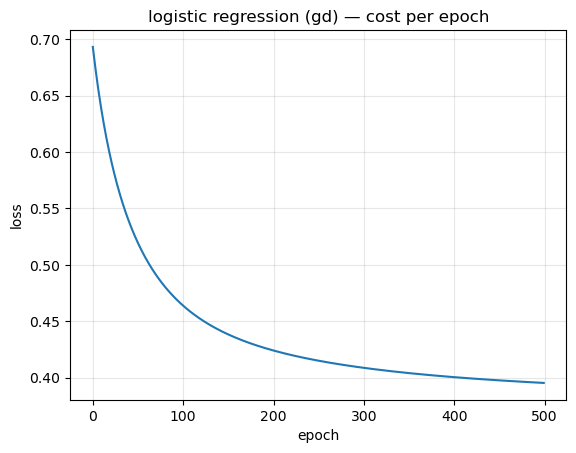

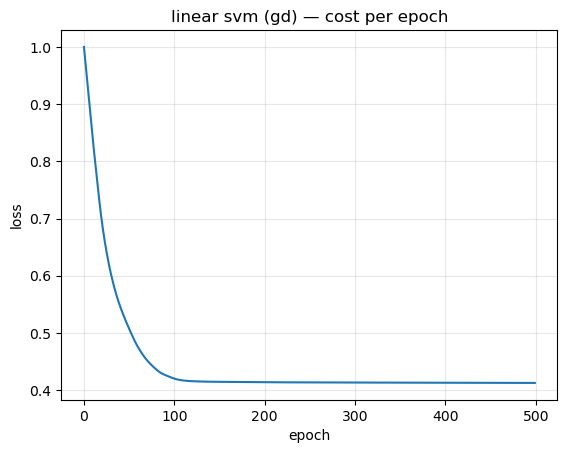

In [29]:
import matplotlib.pyplot as plt

# plot logistic regression cost
plt.figure()
plt.plot(hist_log_best)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('logistic regression (gd) — cost per epoch')
plt.grid(True, alpha=0.3)
plt.show()

# plot svm cost
plt.figure()
plt.plot(hist_svm_best)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('linear svm (gd) — cost per epoch')
plt.grid(True, alpha=0.3)
plt.show()
